# DataFrame 생성하기
 - 일반적으로 분석을 위한 데이터는 다른 데이터 소스(database, 외부 파일)을 통해 dataframe을 생성
 - 여기서는 실습을 통해, dummy 데이터를 생성하는 방법을 다룰 예정

In [3]:
import pandas as pd
import numpy as np 

###  list 와 같은 array-like 객체로부터 DataFrame 생성
list, tuple, array..

In [4]:
df = pd.DataFrame([1,2,3])
df

,0
0,1
1,2
2,3


In [5]:
df.shape

(3, 1)

In [6]:
pd.DataFrame(['dog','cat','멍멍이'])

,0
0,dog
1,cat
2,멍멍이


In [7]:
pd.DataFrame(np.array([111,222,333]))

,0
0,111
1,222
2,333


In [8]:
df = pd.DataFrame([
    [1,2,3],
    [4,5,6]
])

In [9]:
df

,0,1,2
0,1,2,3
1,4,5,6


## shape, ndim, size, len()

In [10]:
df.shape

(2, 3)

In [11]:
df.ndim

2

In [12]:
df.size

6

In [13]:
len(df)

2

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
dtypes: int64(3)
memory usage: 180.0 bytes


## column, index 

#### column, index 변경
list 나 array 등을 사용

In [18]:
df = pd.DataFrame([
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12]
])
df

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


In [19]:
df.columns

RangeIndex(start=0, stop=4, step=1)

In [20]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [21]:
df.columns.values

array([0, 1, 2, 3])

In [22]:
df.index.values

array([0, 1, 2])

In [23]:
df = pd.DataFrame(
    [['a','b'], ['c','d']],
    index=['row1','row2'],
    columns=['col1','col2']
)

In [24]:
df

,col1,col2
row1,a,b
row2,c,d


In [25]:
df.columns = np.array(['AA', 'BB'])
df

,AA,BB
row1,a,b
row2,c,d


In [27]:
df.index = np.array(['홍길동','이순신'])
df

,AA,BB
홍길동,a,b
이순신,c,d


## Dict 로부터 DataFrame 생성하기
- dict 의 key -> column

##### dict 의 value 가 scalar 값인 경우

In [28]:
data = {'a':100,'b':200,'c':300}
pd.DataFrame(data, index=['x','y','z'])

,a,b,c
x,100,200,300
y,100,200,300
z,100,200,300


In [30]:
pd.DataFrame(data, index=['a'])

,a,b,c
a,100,200,300


##### dict 의 value 가 array-like 객체인 경우
ex) list, tuple, array, Series ...

In [31]:
data = {'a':[100],'b':[200], 'c':[300]}
pd.DataFrame(data)

,a,b,c
0,100,200,300


In [32]:
data = {'a':[100,200,300],'b':[10,20,30], 'c':[1,2,3]}
pd.DataFrame(data)

,a,b,c
0,100,10,1
1,200,20,2
2,300,30,3


In [33]:
data = {
    'a':np.array([1,2,3]),
    'b':np.array([10,20,30]),
    'c':np.array([100,200,300])
}
pd.DataFrame(data)

,a,b,c
0,1,10,100
1,2,20,200
2,3,30,300


##### dict 의 value 가 dict 인 경우

In [35]:
pd.DataFrame({
    'k' : {'a':10,'b':20},
    'j' : {'a':100, 'b':200, 'c':300}
})

,k,j
a,10.0,100
b,20.0,200
c,NaN,300


## Series로 부터 생성하기
 - 각 Series의 인덱스 → column
 -결국 DataFrame = Series x Series x ...  (Series 가 쌓인 형태가 DataFrame)

In [36]:
a = pd.Series([100,200,300], ['a','b','c'])
b = pd.Series([101,201,301], ['a','b','c'])
c = pd.Series([102,202,302], ['a','b','c'])

In [37]:
pd.DataFrame([a,b,c])

,a,b,c
0,100,200,300
1,101,201,301
2,102,202,302


In [38]:
d = pd.Series([103, 203, 303], ['a','b','d'])

df = pd.DataFrame([a,b,c,d])
df

,a,b,c,d
0,100.0,200.0,300.0,NaN
1,101.0,201.0,301.0,NaN
2,102.0,202.0,302.0,NaN
3,103.0,203.0,NaN,303.0


## 컬럼 이름 변경 rename()

In [39]:
df

,a,b,c,d
0,100.0,200.0,300.0,NaN
1,101.0,201.0,301.0,NaN
2,102.0,202.0,302.0,NaN
3,103.0,203.0,NaN,303.0


In [ ]:
df.rename(columns={'a':'kor','b':'math'})

,kor,math,c,d
0,100.0,200.0,300.0,NaN
1,101.0,201.0,301.0,NaN
2,102.0,202.0,302.0,NaN
3,103.0,203.0,NaN,303.0


In [41]:
df

,a,b,c,d
0,100.0,200.0,300.0,NaN
1,101.0,201.0,301.0,NaN
2,102.0,202.0,302.0,NaN
3,103.0,203.0,NaN,303.0


##### 인덱스 변경

In [42]:
df.index = ['a','b','c','d']
df

,a,b,c,d
a,100.0,200.0,300.0,NaN
b,101.0,201.0,301.0,NaN
c,102.0,202.0,302.0,NaN
d,103.0,203.0,NaN,303.0


## set_index(), reset_index()

In [43]:
df

,a,b,c,d
a,100.0,200.0,300.0,NaN
b,101.0,201.0,301.0,NaN
c,102.0,202.0,302.0,NaN
d,103.0,203.0,NaN,303.0


In [44]:
df.reset_index()

,index,a,b,c,d
0,a,100.0,200.0,300.0,NaN
1,b,101.0,201.0,301.0,NaN
2,c,102.0,202.0,302.0,NaN
3,d,103.0,203.0,NaN,303.0


In [45]:
df

,a,b,c,d
a,100.0,200.0,300.0,NaN
b,101.0,201.0,301.0,NaN
c,102.0,202.0,302.0,NaN
d,103.0,203.0,NaN,303.0


In [46]:
df.reset_index(drop=True)

,a,b,c,d
0,100.0,200.0,300.0,NaN
1,101.0,201.0,301.0,NaN
2,102.0,202.0,302.0,NaN
3,103.0,203.0,NaN,303.0


In [47]:
df.set_index('a')

,b,c,d
a,,,
100.0,200.0,300.0,NaN
101.0,201.0,301.0,NaN
102.0,202.0,302.0,NaN
103.0,203.0,NaN,303.0


In [48]:
df.set_index('a', drop=False)

,a,b,c,d
a,,,,
100.0,100.0,200.0,300.0,NaN
101.0,101.0,201.0,301.0,NaN
102.0,102.0,202.0,302.0,NaN
103.0,103.0,203.0,NaN,303.0


In [49]:
df

,a,b,c,d
a,100.0,200.0,300.0,NaN
b,101.0,201.0,301.0,NaN
c,102.0,202.0,302.0,NaN
d,103.0,203.0,NaN,303.0


In [50]:
df.reset_index().set_index('a')

,index,b,c,d
a,,,,
100.0,a,200.0,300.0,NaN
101.0,b,201.0,301.0,NaN
102.0,c,202.0,302.0,NaN
103.0,d,203.0,NaN,303.0


In [51]:
df.reset_index(drop=True).set_index('a', drop=False)

,a,b,c,d
a,,,,
100.0,100.0,200.0,300.0,NaN
101.0,101.0,201.0,301.0,NaN
102.0,102.0,202.0,302.0,NaN
103.0,103.0,203.0,NaN,303.0


## inplace = True
대부분의 함수들이 원본변화 안시킨다.  원본 변화 발생시키려면 **inplace=True**

In [52]:
df.reset_index(drop=True, inplace=True)
df

,a,b,c,d
0,100.0,200.0,300.0,NaN
1,101.0,201.0,301.0,NaN
2,102.0,202.0,302.0,NaN
3,103.0,203.0,NaN,303.0


## Multi-level index, Multi-level column 

In [53]:
pd.DataFrame({'k':[10]})

,k
0,10


In [54]:
pd.DataFrame({('k0','k1'): [10]})

,k0
,k1
0,10


In [55]:
pd.DataFrame({
    ('k0','k1'):{'a':10,'b':20}
})

,k0
,k1
a,10
b,20


In [56]:
pd.DataFrame({
    ('col1','a'):[10,20,30],
    ('col1','b') :[40,50,60]
}, index=['i','j','k'])

col1    
     a   b
i   10  40
j   20  50
k   30  60

In [57]:
pd.DataFrame({
    ('k','k1'):[10,20,30,31],
    ('k','k2'):[40,50,60,61],
    ('j','j1'):[70,80,90,91],
    ('j','j2'):[100,110,120,121]
}, index=[['서울','서울','경기','경기'],['평일','휴일','평일','휴일']])

k       j     
       k1  k2  j1   j2
서울 평일  10  40  70  100
   휴일  20  50  80  110
경기 평일  30  60  90  120
   휴일  31  61  91  121

##### [도전] 다음과 같은 DataFrame 만들기

#### 도전
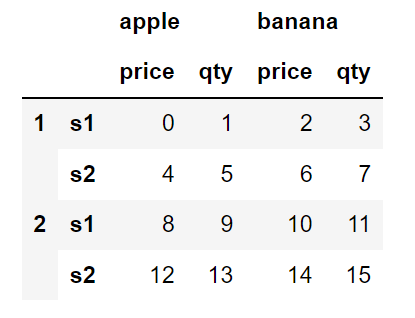

In [1]:
import pandas as pd
import numpy as np 

In [4]:
pd.DataFrame({
    ('apple','price'):[0,4,8,12],
    ('apple', 'qty'):[1,5,9,13],
    ('banana','price'):[2,6,10,14],
    ('banana', 'qty'):[3,7,11,15]},
    index=[[1,1,2,2],['s1','s2','s1','s2']]
)

apple     banana    
     price qty  price qty
1 s1     0   1      2   3
  s2     4   5      6   7
2 s1     8   9     10  11
  s2    12  13     14  15

In [5]:
pd.DataFrame({
    ('apple','price'):np.arange(13,step=4),
    ('apple', 'qty'):np.arange(1,14,step=4),
    ('banana','price'):np.arange(2,15,step=4),
    ('banana', 'qty'):np.arange(3,16,step=4)},
    index=[[1,1,2,2],['s1','s2','s1','s2']]
)

apple     banana    
     price qty  price qty
1 s1     0   1      2   3
  s2     4   5      6   7
2 s1     8   9     10  11
  s2    12  13     14  15

In [6]:
pd.DataFrame(
    np.arange(16).reshape(4,4),
    index=[[1,1,2,2],['s1','s2','s1','s2']],
    columns=[['apple','apple','banana','banana'],
             ['price','qty','price','qty']]
)

apple     banana    
     price qty  price qty
1 s1     0   1      2   3
  s2     4   5      6   7
2 s1     8   9     10  11
  s2    12  13     14  15